In [2]:
#1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#生成数据
np.random.seed(seed = 1) #固定随机数
X_min = 4 #X的下限
X_max = 30 #X的上限
X_n = 16 #数据的个数
X = 5 + 25*np.random.rand(X_n) #生成X
Prm_c = [170,108,0.2] #生成参数
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n)
np.savez('ch5_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)

In [3]:
#2
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [4]:
#3
print(np.round(X,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [5]:
#4
print(np.round(T,2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


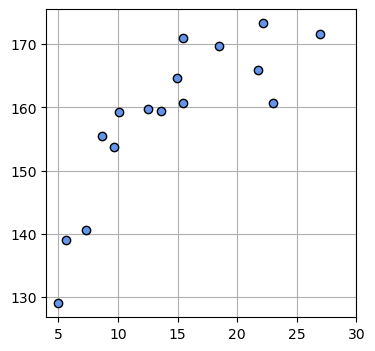

In [6]:
#5
#在图形上显示数据
plt.figure(figsize = (4,4))
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

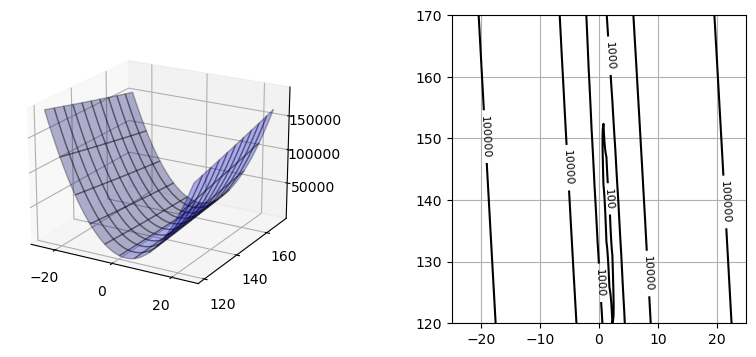

In [7]:
#6
from mpl_toolkits.mplot3d import Axes3D

#均方误差函数
def mse_line(x,t,w):
    y = w[0]*x + w[1]
    mse = np.mean((y-t)**2)
    return mse

#计算
xn = 100 #等高线的分辨率
w0_range = [-25,25]
w1_range = [120,170]
w0 = np.linspace(w0_range[0],w0_range[1],xn)
w1 = np.linspace(w1_range[0],w1_range[1],xn)
ww0,ww1 = np.meshgrid(w0,w1)
J = np.zeros((len(w0),len(w1)))
for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1,i0] = mse_line(X,T,(w0[i0],w1[i1]))
        
#显示
plt.figure(figsize = (9.5,4))
plt.subplots_adjust(wspace = 0.5)

ax = plt.subplot(1,2,1,projection = '3d')
ax.plot_surface(ww0,ww1,J,rstride=10,cstride=10,alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont = plt.contour(ww0,ww1,J,30,colors='black',levels=[100,1000,10000,100000])
cont.clabel(fmt='%d',fontsize=8)
plt.grid(True)
plt.show()

In [8]:
#7
#均方误差的梯度

def dmse_line(x,t,w):
    y = w[0]*x + w[1]
    d_w0 = 2*np.mean((y-t)*x)
    d_w1 = 2*np.mean(y-t)
    return d_w0,d_w1

In [9]:
#8
#X是生成出来的年龄，T是生成出来的身高
d_w = dmse_line(X,T,[10,165])
print(np.round(d_w,1))

[5046.3  301.8]


 重复次数 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


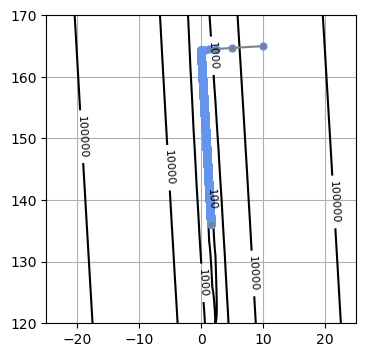

In [10]:
# 代码清单 5-1-(9)
# 梯度法 ------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0]  # 初始参数
    alpha = 0.001  # 学习率b
    tau_max = 100000  # 重复的最大次数
    eps = 0.1  # 停止重复的梯度绝对值的阀值
    w_hist = np.zeros([tau_max, 2])
    w_hist[0, :] = w_init
    for tau in range(1, tau_max):
        dmse = dmse_line(x, t, w_hist[tau - 1])
        w_hist[tau, 0] = w_hist[tau - 1, 0] - alpha * dmse[0]
        w_hist[tau, 1] = w_hist[tau - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: # 结束判断
            break
    w0 = w_hist[tau, 0]
    w1 = w_hist[tau, 1]
    w_hist = w_hist[:tau, :]
    return w0, w1, dmse, w_hist


# 主处理 ------------------------------------
plt.figure(ﬁgsize=(4, 4))
# 显示 MSE 的等高线
wn = 100  # 等高线分辨率
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], wn)
w1 = np.linspace(w1_range[0], w1_range[1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
J = np.zeros((len(w0), len(w1)))
for i0 in range(wn):
    for i1 in range(wn):
        J[i1, i0] = mse_line(X, T, (w0[i0], w1[i1]))
cont = plt.contour(ww0, ww1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
# 调用梯度法
W0, W1, dMSE, W_history = fit_line_num(X, T)
# 显示结果 
print(' 重复次数 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0 = 1.540, w1 = 136.176
SD = 7.002 cm


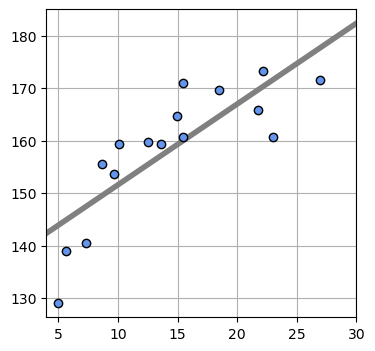

In [11]:
# 代码清单5-1-(10)
# 显示直线 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color = (.5, .5, .5), linewidth = 4)

# 主处理 ------------------------------------
plt.figure(figsize = (4, 4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0 = {0:.3f}, w1 = {1:.3f}".format(W0, W1))
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker = 'o', linestyle = 'None',color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

w0 = 1.540, w1 = 136.176
SD = 7.002 cm


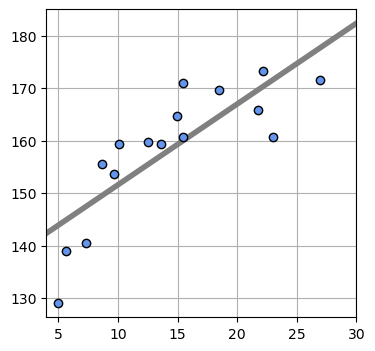

In [12]:
# 代码清单5-1-(10)
# 显示直线 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color = (.5, .5, .5), linewidth = 4)
    
# 主处理 ------------------------------------
plt.figure(figsize = (4, 4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0 = {0:.3f}, w1 = {1:.3f}".format(W0, W1))
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker = 'o', linestyle = 'None',color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

w0 = 1.558, w1 = 135.872
SD = 7.001 cm


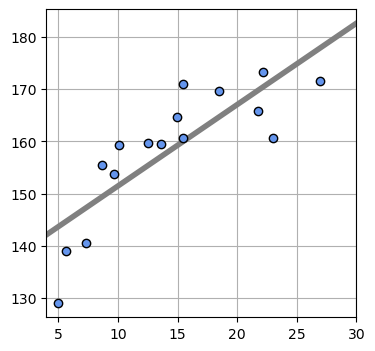

In [13]:
#解析解
def fit_line(x,t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t*x)
    mxx = np.mean(x*x)
    
    w0 = (mtx - mt*mx)/(mxx - mx**2)
    w1 = mt - w0*mx
    
    return np.array([w0,w1])

#主处理
W = fit_line(X, T)
print("w0 = {0:.3f}, w1 = {1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize = (4, 4))
show_line(W)
plt.plot(X, T, marker = 'o', linestyle = 'None',color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


In [14]:
# 代码清单5-1-(12)
# 生成二维数据 --------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed = 1) # 固定随机数
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [15]:
# 代码清单5-1-(13)
print(np.round(X0, 2)) #X1是年龄数据
print(np.round(X1, 2)) #x2是体重数据
print(np.round(T, 2)) #T是身高数据


[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


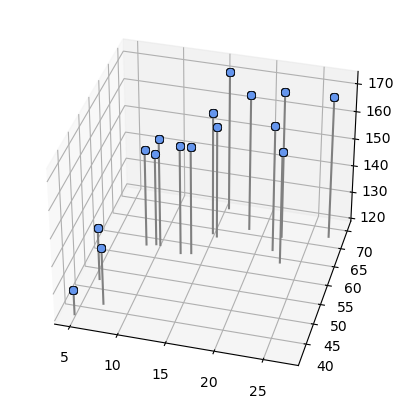

In [16]:
# 代码清单5-1-(14)
# 显示二维数据 ------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],[120, t[i]], color = 'gray')
        ax.plot(x0, x1, t, 'o',
                color = 'cornflowerblue', markeredgecolor = 'black',
                markersize = 6, markeredgewidth = 0.5)
        ax.view_init(elev = 35, azim = -75)

# 主处理 ------------------------------------
plt.figure(figsize = (6, 5))
ax = plt.subplot(1,1,1,projection = '3d')
show_data2(ax, X0, X1, T)
plt.show()

SD = 12.876 cm


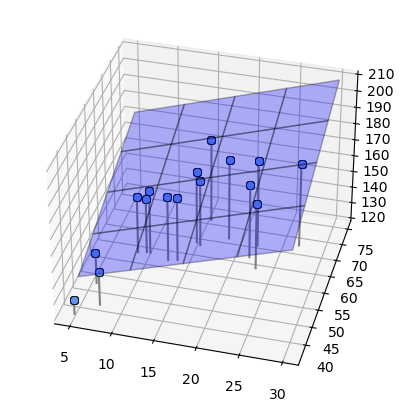

In [17]:
# 代码清单5-1-(15)
# 显示平面------------------------------
def show_plane(ax,w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)

    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1]*px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride = 1, cstride = 1, alpha = 0.3,
                    color = 'blue', edgecolor = 'black')

#平面的MSE------------------------------
def mse_plane(x0,x1,t,w):
    y = w[0]*x0 + w[1]*x1 + w[2]
    mse = np.mean((y-t)**2)
    return mse

#主处理----------------------------------
plt.figure(figsize = (6, 5))
ax = plt.subplot(1,1,1,projection = '3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.show()

w0 = 0.5, w1 = 1.1, w2 = 89.0
SD = 2.546 cm


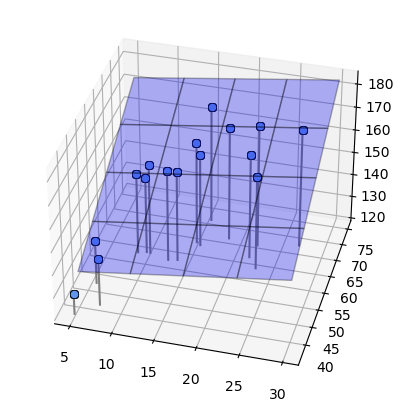

In [18]:
# 代码清单5-1-(16)
# 解析解 ---------------------------
def fit_plane(x0,x1,t):
    c_tx0 = np.mean(t*x0) - np.mean(t)*np.mean(x0)
    c_tx1 = np.mean(t*x1) - np.mean(t)*np.mean(x1)
    c_x0x1 = np.mean(x0*x1) - np.mean(x0)*np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1*c_x0x1 - v_x1*c_tx0)/(c_x0x1**2 - v_x0*v_x1)
    w1 = (c_tx0*c_x0x1 - v_x0*c_tx1)/(c_x0x1**2 - v_x0*v_x1)
    w2 = -w0*np.mean(x0) - w1*np.mean(x1) + np.mean(t)
    return np.array([w0,w1,w2])

#主处理-------------------------------
plt.figure(figsize = (6, 5))
ax = plt.subplot(1,1,1,projection = '3d')
W = fit_plane(X0, X1, T)
print("w0 = {0:.1f}, w1 = {1:.1f}, w2 = {2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.show()